### let's take a look at the mms slices and make sure they match what we were trying to make

In [114]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pyspedas
import pytplot
import datetime as dt
from scipy.constants import physical_constants

In [115]:
# Physical constants (for unit conversion and plasma freq calc.)
c = physical_constants["speed of light in vacuum"][0]  # m/s
e = physical_constants["elementary charge"][0]  # coulombs
m_e = physical_constants["electron mass"][0]  # kg
e_0 = physical_constants["vacuum electric permittivity"][0]  # Farads/m

In [116]:
# pick a (small) slices file to look at
filename = "/tigress/kendrab/analysis-notebooks/mms_data/mms_slices/2023-06-16T17-41-30_2023-06-16T20-31-30.h5"
chosen_slice = 257 # which short snippet to look at

# get the data
with h5py.File(filename, 'r') as file:
    B = file['B'][()]
    E = file['E'][()]
    j = file['j'][()]
    time = file['time'][()]
    
print(B.shape)
print(j[678])
print(B[678])
print(E[678])
print(np.max(j), np.max(B), np.max(E))
print(time)

(2777, 3, 30)
[[-0.00422602 -0.00651408 -0.00104892 -0.00546565 -0.01078461 -0.01637911
  -0.02245637 -0.02026812 -0.01645795 -0.00978145 -0.01186174 -0.01660515
  -0.01707195 -0.01416998 -0.01296746 -0.01592711 -0.01170277 -0.00833806
  -0.01193928 -0.01362601 -0.00926048 -0.00475358 -0.00627013 -0.00621019
  -0.00675388 -0.00318185 -0.00543741 -0.01906627 -0.02185341 -0.02298159]
 [ 0.01137311  0.00701981  0.00749295  0.00556486  0.00342493  0.00029334
   0.00115762  0.00141868 -0.00282198 -0.001749    0.0055415   0.00464422
  -0.00668606 -0.00593112 -0.00221487  0.00537281  0.00250141 -0.00328659
  -0.00210499 -0.00332018 -0.00180786  0.00333117  0.00320475 -0.00010258
  -0.0032979   0.00186035  0.00213468 -0.00088665  0.00114483  0.0020749 ]
 [ 0.00654232  0.00388256  0.00278372  0.00484445  0.00537607  0.00525522
   0.00727426  0.0075073   0.0043111   0.00124983  0.00518992  0.00629908
   0.00262337  0.00351674  0.00552351  0.00895924  0.006125    0.00342008
   0.00471721  0.00345

In [117]:
# # try new scalings
# # B is fine
# # j ~ n v
# # E ~ v^2
# n_ratio = 1/1.9e17
# v_ratio = 40
# E_ratio = 40

# j *= 1.9e-16
# E *= E_ratio

# print(j[678])
# print(E[678])
# print(np.max(j), np.max(B), np.max(E))

In [118]:
# nan checks
nans = np.isnan(j).any(axis=(1,2))
print(np.sum(nans))

0


In [119]:
# put time into thing you can plot against
time = np.vectorize(lambda x: dt.datetime.strptime(x.decode(), '%Y-%m-%dT%H:%M:%S.%f'))(time)

min_time = time[chosen_slice,0].strftime('%Y-%m-%d/%H:%M:%S.%f')
max_time = time[chosen_slice,-1].strftime('%Y-%m-%d/%H:%M:%S.%f')

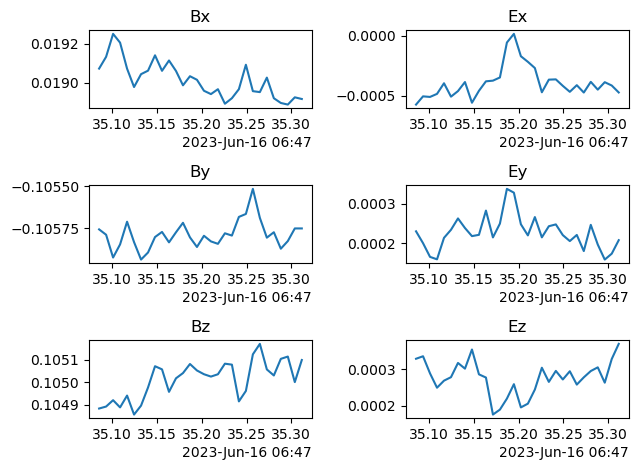

In [120]:
# plot the things
fig, ax = plt.subplots(nrows=3, ncols=2)

ax[0,0].plot(time[257], B[chosen_slice, 0])
ax[0,0].set(title="Bx")
ax[1,0].plot(time[257], B[chosen_slice, 1])
ax[1,0].set(title="By")
ax[2,0].plot(time[257], B[chosen_slice, 2])
ax[2,0].set(title="Bz")
ax[0,1].plot(time[257], E[chosen_slice, 0])
ax[0,1].set(title="Ex")
ax[1,1].plot(time[257], E[chosen_slice, 1])
ax[1,1].set(title="Ey")
ax[2,1].plot(time[257], E[chosen_slice, 2])
ax[2,1].set(title="Ez")
fig.tight_layout()
plt.show()

In [121]:
# get the data straight from pyspedas
timerange = [min_time, max_time]

pyspedas.mms.fpi(trange=timerange, probe='1', data_rate='brst', datatype='des-moms', time_clip=True,
                                varnames=["mms1_des_numberdensity_brst"]) 
pyspedas.mms.fgm(trange=timerange, probe='1', data_rate='brst', time_clip=True,
                                varnames=["mms1_fgm_b_gsm_brst_l2"])
pyspedas.mms.edp(trange=timerange, probe='1', data_rate='brst', time_clip=True,
                                varnames=["mms1_edp_dce_gse_brst_l2"]) 

Time clip returns empty data.
The name mms1_des_errorflags_brst is currently not in pytplot
The name mms1_des_compressionloss_brst is currently not in pytplot
The name mms1_des_pitchangdist_lowen_brst is currently not in pytplot
The name mms1_des_pitchangdist_miden_brst is currently not in pytplot
The name mms1_des_pitchangdist_highen_brst is currently not in pytplot
The name mms1_des_errorflags_brst_moms is currently not in pytplot
The name mms1_des_errorflags_brst_moms is currently not in pytplot
The name mms1_des_compressionloss_brst_moms is currently not in pytplot
The name mms1_des_compressionloss_brst_moms is currently not in pytplot
Problem reading the variable: mms1_des_compressionloss_brst_moms
The name mms1_dis_compressionloss_brst_moms is currently not in pytplot
The name mms1_dis_compressionloss_brst_moms is currently not in pytplot
Problem reading the variable: mms1_dis_compressionloss_brst_moms
The name mms1_des_compressionloss_brst_dist is currently not in pytplot
The na

['mms1_edp_dce_gse_brst_l2']

In [122]:
B_mms = pytplot.data_quants["mms1_fgm_b_gsm_brst_l2"][:,:3]
E_mms = pytplot.data_quants["mms1_edp_dce_gse_brst_l2"][:,:3]
n = pytplot.data_quants["mms1_des_numberdensity_brst"]  # cm^-3
# calculate plasma frequency
w_pe = np.sqrt((n*100**3)*e**2/e_0/m_e)  # converting to m^-3 then calculating

16-Oct-23 10:44:03: /home/kendrab/.conda/envs/pyspedas/lib/python3.7/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")



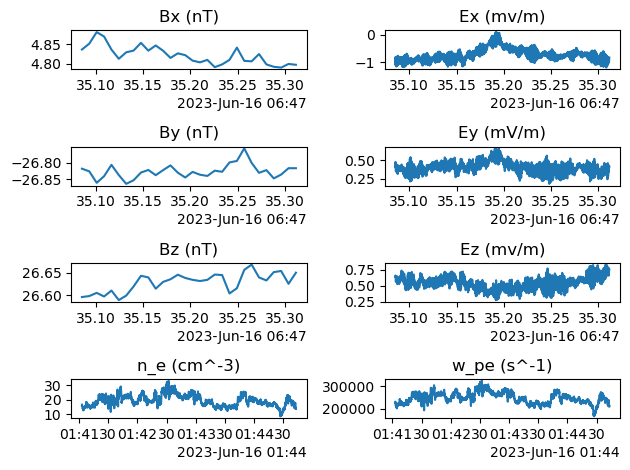

In [123]:
# plot the things
fig, ax = plt.subplots(nrows=4, ncols=2)

ax[0,0].plot(B_mms.time, B_mms.isel(v_dim=0))
ax[0,0].set(title="Bx (nT)")
ax[1,0].plot(B_mms.time, B_mms.isel(v_dim=1))
ax[1,0].set(title="By (nT)")
ax[2,0].plot(B_mms.time, B_mms.isel(v_dim=2))
ax[2,0].set(title="Bz (nT)")
ax[0,1].plot(E_mms.time, E_mms.isel(v_dim=0))
ax[0,1].set(title="Ex (mv/m)")
ax[1,1].plot(E_mms.time, E_mms.isel(v_dim=1))
ax[1,1].set(title="Ey (mV/m)")
ax[2,1].plot(E_mms.time, E_mms.isel(v_dim=2))
ax[2,1].set(title="Ez (mv/m)")
ax[3,0].plot(n.time, n)
ax[3,0].set(title='n_e (cm^-3)')
ax[3,1].plot(n.time, w_pe)
ax[3,1].set(title='w_pe (s^-1)')
fig.tight_layout()
plt.show()